# Standard Solow Model

Imports and set magics:

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

**Write out the model in equations here.** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

# Standard Solow Model:

$$
\begin{gathered}
Y_t=K_t^\alpha\left(A_t L_t\right)^{1-\alpha}, 0<\alpha<1 \\
S_t=s Y_t, 0<s<1,0<\delta<1 \\
K_{t+1}=S_t+(1-\delta) K_t \\
L_{t+1}=(1+n) L_t, n \geq 0 \\
A_{t+1}=(1+g) A_t, g \geq 0
\end{gathered}
$$

# Semi-endogenous Solow Model (Chp. 8)

$$Y_t = K_t^{\alpha} (A_t L_t)^{(1-\alpha)}, 1>\alpha>0$$
$$A_t=K_t^{\phi}, \phi<1$$
$$K_{t+1}=s Y_t +(1+\delta) K_t , 0<s<1,0<\delta<1 , K_t>0$$
$$L_{t+1}=(1+n)L_t, n\geq0$$

Where:
Y = Gross Domestic Product
K = Capital stock
L = Labor force
A = Technological progress (total factor productivity)
s = Savings rate (proportion of output saved and invested)
\delta = Depreciation rate (rate at which capital stock depreciates)
n = Labor force growth rate
a = is the output elasticity of capital
1-a is the output elasticity og labour

In [12]:
# Define the model parameters
alpha = 0.3
phi = 0.2
s = 0.2
delta = 0.1
n = 0.02

# Define the production function and technological progress function
def production(K, L, A):
    return K**alpha * (A*L)**(1-alpha)

def tech_progress(K, phi):
    return K**phi

# Define the system of equations to solve for the steady state
def steady_state_system(x):
    K, Y = x
    A = tech_progress(K, phi)
    dK_dt = s*production(K, 1, A) - (delta+n)*K
    dY_dt = n*Y + production(K, 1, A) - Y
    return [dK_dt, dY_dt]

# Find the steady state numerically using the fsolve function from scipy.optimize
K_ss, Y_ss = optimize.fsolve(steady_state_system, [1, 1])

# Print the results
print("Steady state capital stock: ", K_ss)
print("Steady state GDP: ", Y_ss)

Steady state capital stock:  2.489765710467247
Steady state GDP:  1.524346353347294


This code defines a function solow to simulate the Solow model for a given initial condition of capital stock and GDP, and a range of initial capital stock and GDP values are specified using the linspace function. The loop then iterates over all combinations of initial conditions, and for each combination, the Solow model is simulated and checked for convergence using a tolerance of 1e-6. The convergence times are then printed to the console.

Now we add a share of labor income in GDP and find the new steady state:

In [13]:
w = 0.6  # Share of labor income in GDP


# Define the system of equations to solve for the steady state
def steady_state_system(x):
    K, Y = x
    A = tech_progress(K, phi)
    dK_dt = s*production(K, 1, A) - (delta+n)*K
    dY_dt = n*Y + (1-w)*production(K, 1, A) - Y
    return [dK_dt, dY_dt]

# Find the steady state numerically using the fsolve function from scipy.optimize
K_ss, Y_ss = optimize.fsolve(steady_state_system, [1, 1])

# Print the results
print("Steady state capital stock: ", K_ss)
print("Steady state GDP: ", Y_ss)

Steady state capital stock:  2.4897657104672475
Steady state GDP:  0.6097385413389179


Now we simulate the Solow model using the Euler method, with the initial capital stock set to 1 and the initial GDP per worker calculated using the production function and technological progress function. 

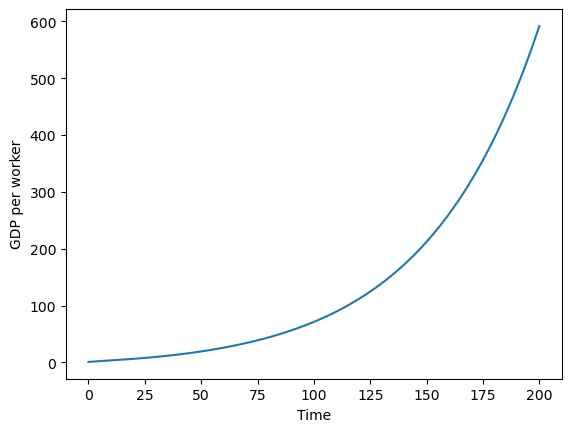

In [14]:


# Define the system of equations for the Solow model
def solow_model(K, Y, A):
    dK_dt = s*production(K, 1, A) - (delta+n)*K
    dY_dt = n*Y + (1-w)*production(K, 1, A)
    return dK_dt, dY_dt

# Define the initial conditions
K0 = 1
Y0 = production(K0, 1, tech_progress(K0, phi))

# Define the simulation parameters
T = 200
dt = 1.0

# Define the arrays to store the simulation results
K_path = np.zeros(T+1)
Y_path = np.zeros(T+1)
A_path = np.zeros(T+1)

# Set the initial values
K_path[0] = K0
Y_path[0] = Y0
A_path[0] = tech_progress(K0, phi)

# Simulate the Solow model using the Euler method
for t in range(T):
    K, Y, A = K_path[t], Y_path[t], A_path[t]
    dK_dt, dY_dt = solow_model(K, Y, A)
    K_path[t+1] = K + dK_dt*dt
    Y_path[t+1] = Y + dY_dt*dt
    A_path[t+1] = tech_progress(K_path[t+1], phi)

# Plot the results
t_values = np.arange(T+1)
y_values = Y_path/K_path  # GDP per worker
plt.plot(t_values, y_values)
plt.xlabel('Time')
plt.ylabel('GDP per worker')
plt.show()


Now adding technological growth and plotting capital per worker against gdp per worker:

Steady state value of capital per worker:  0.48508155097021366
Steady state value of output per worker:  0.33805994591060196


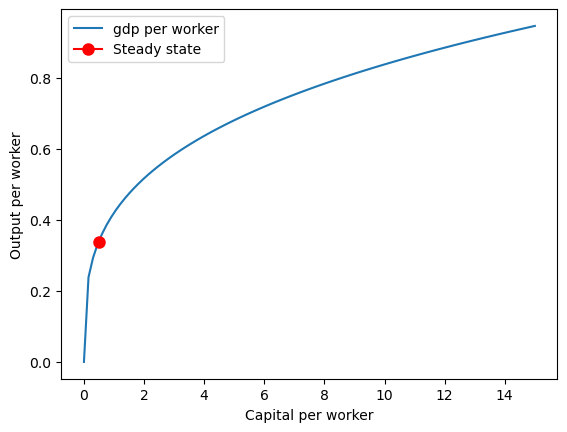

In [15]:
# Function to calculate the steady state value of capital per worker
def k_star(s, alpha, delta, n, g):
    return ((s/(n+g+delta))**(1/(1-alpha))) * ((n+g+delta)/alpha)

# Function to calculate the steady state value of output per worker
def y_star(s, alpha, delta, n, g):
    return k_star(s, alpha, delta, n, g)**alpha * (n+g+delta)

# Parameter values
alpha = 0.3
phi = 0.2
s = 0.2
delta = 0.1
n = 0.02
g = 0.3

# Calculate steady state values
k_star_val = k_star(s, alpha, delta, n, g)
y_star_val = y_star(s, alpha, delta, n, g)

# Print steady state values
print("Steady state value of capital per worker: ", k_star_val)
print("Steady state value of output per worker: ", y_star_val)

# Plot the Solow diagram
k_vals = np.linspace(0, 15, 100)
y_vals = k_vals**alpha * (n+g+delta)
plt.plot(k_vals, y_vals, label="gdp per worker")
plt.plot([k_star_val], [y_star_val], marker='o', markersize=8, color="red", label="Steady state")
plt.xlabel("Capital per worker")
plt.ylabel("Output per worker")
plt.legend()
plt.show()

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 

# Standard Solow Model:

This model were presented and solved in Problem Set 6. In this given model any growth in technology is exogen and hence just given. We want to expand this model in order to see what endogenous growth will do to the results. 

# Semi-endogenous Solow Model (Chp. 8)
